In [16]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
model_df = pd.read_csv(os.path.join('data','model'))

In [6]:
model_df.columns

Index(['Unnamed: 0', 'Score', 'NoUsersRating', 'MetaScore', 'NoReviews-Users',
       'NoReviews-Crit', 'OpeningWE(USA)($)', 'Gross(USA)($)',
       'CumulativeWorldWide Gross($)', 'Year', 'NoSeriesNextYear'],
      dtype='object')

In [7]:
model_df.rename(columns={'Score': 'X1',
                         'NoUsersRating' : 'X2', 
                         'MetaScore':'X3', 
                         'NoReviews-Users':'X4',
                         'NoReviews-Crit':'X5',
                         'OpeningWE(USA)($)':'X6', 
                         'Gross(USA)($)':'X7',
                         'CumulativeWorldWide Gross($)':'X8', 
                         'NoSeriesNextYear':'Y'}, inplace=True)

In [8]:
model_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Year,Y
0,0,0.73,140117.0,86.0,517.0,176.0,7465343.0,134218018.0,166200000.0,1978,17
1,2,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0,1980,11
2,205,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0,1980,11
3,1,0.61,1139.0,68.5,16.0,10.0,19828687.0,15934737.0,15934737.0,1980,11
4,3,0.68,85553.0,87.0,277.0,127.0,14100523.0,108185706.0,108185706.0,1981,8


In [9]:
model_df = model_df[['Y','X1','X2','X3','X4','X5','X6','X7','X8']].copy()

In [10]:
model_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8
0,17,0.73,140117.0,86.0,517.0,176.0,7465343.0,134218018.0,166200000.0
1,11,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0
2,11,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0
3,11,0.61,1139.0,68.5,16.0,10.0,19828687.0,15934737.0,15934737.0
4,8,0.68,85553.0,87.0,277.0,127.0,14100523.0,108185706.0,108185706.0


In [11]:
result = sm.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X6+ X7 + X8", data=model_df).fit()

In [12]:
result.params

Intercept    3.847306e+01
X1          -2.014724e+01
X2           1.063304e-05
X3           2.123084e-03
X4          -7.234460e-03
X5           7.261287e-02
X6          -1.714963e-08
X7          -1.472451e-07
X8           5.838944e-08
dtype: float64

In [13]:
result.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.450</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.428</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   19.98</td>
</tr>
<tr>
  <th>Date:</th>             <td>Tue, 24 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>6.95e-22</td>
</tr>
<tr>
  <th>Time:</th>                 <td>17:37:48</td>     <th>  Log-Likelihood:    </th> <td> -828.00</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1674.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   195</td>      <th>  BIC:               </th> <td>   1704.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     8</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   38.4731</td> <td>   16.051</td> <td>    2.397</td> <td> 0.017</td> <td>    6.817</td> <td>   70.130</td>
</tr>
<tr>
  <th>X1</th>        <td>  -20.1472</td> <td>   10.513</td> <td>   -1.916</td> <td> 0.057</td> <td>  -40.881</td> <td>    0.587</td>
</tr>
<tr>
  <th>X2</th>        <td> 1.063e-05</td> <td> 9.46e-06</td> <td>    1.124</td> <td> 0.262</td> <td>-8.02e-06</td> <td> 2.93e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>    0.0021</td> <td>    0.225</td> <td>    0.009</td> <td> 0.992</td> <td>   -0.441</td> <td>    0.445</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0072</td> <td>    0.003</td> <td>   -2.468</td> <td> 0.014</td> <td>   -0.013</td> <td>   -0.001</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.0726</td> <td>    0.011</td> <td>    6.574</td> <td> 0.000</td> <td>    0.051</td> <td>    0.094</td>
</tr>
<tr>
  <th>X6</th>        <td>-1.715e-08</td> <td> 8.81e-08</td> <td>   -0.195</td> <td> 0.846</td> <td>-1.91e-07</td> <td> 1.57e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.472e-07</td> <td> 3.98e-08</td> <td>   -3.703</td> <td> 0.000</td> <td>-2.26e-07</td> <td>-6.88e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 5.839e-08</td> <td> 1.48e-08</td> <td>    3.941</td> <td> 0.000</td> <td> 2.92e-08</td> <td> 8.76e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>32.300</td> <th>  Durbin-Watson:     </th> <td>   0.955</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  43.927</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.973</td> <th>  Prob(JB):          </th> <td>2.89e-10</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.176</td> <th>  Cond. No.          </th> <td>6.74e+09</td>
</tr>
</table>

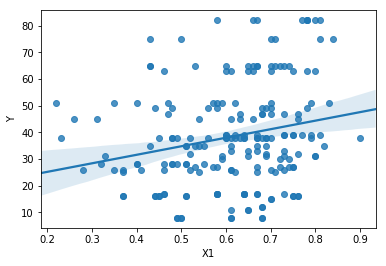

In [17]:
sns.regplot(model_df.X1, model_df.Y)